<a href="https://colab.research.google.com/github/Jitmandal051004/iris-prediction_nn/blob/main/iris_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self, in_feature=4, h1=8, h2=9, out_feature=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_feature, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
torch.manual_seed(31)
model = Model()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
my_df["species"] = my_df["species"].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
X = my_df.drop("species", axis=1).values #drop and .values convert to numpy array
y = my_df["species"].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [12]:
X_train

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 2.6, 3.5, 1. ],
       [6.1, 3. , 4.6, 1.4],
       [5. , 2.3, 3.3, 1. ],
       [5.5, 3.5, 1.3, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [7.1, 3. , 5.9, 2.1],
       [6.9, 3.1, 5.4, 2.1],
       [6.4, 2.9, 4.3, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 2.5, 5. , 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.5, 1.4, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [6. , 2.2, 4. , 1. ],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [7.2, 3.2, 6. , 1.8],
       [7.7, 3. , 6.1, 2.3],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.8, 3.2, 5.9, 2.3],
       [4.4, 3. , 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 3.4, 1.5, 0.2],
       [6.1, 2.8, 4. , 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.1, 3.4, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [6.5, 3

In [13]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
epochs = 100
losses = []

In [16]:
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.0937579870224
Epoch: 10 and loss: 0.9539112448692322
Epoch: 20 and loss: 0.7626267671585083
Epoch: 30 and loss: 0.5458598732948303
Epoch: 40 and loss: 0.40030142664909363
Epoch: 50 and loss: 0.30937087535858154
Epoch: 60 and loss: 0.22732803225517273
Epoch: 70 and loss: 0.15470436215400696
Epoch: 80 and loss: 0.1050168052315712
Epoch: 90 and loss: 0.07669716328382492


Text(0.5, 0, 'Epochs')

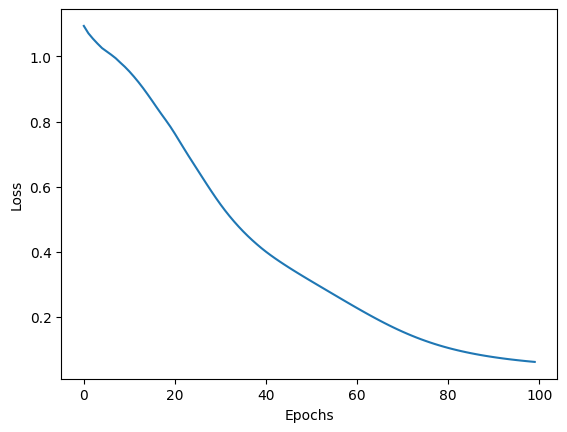

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [18]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.1670)

In [20]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct')

1.) tensor([-2.5889,  4.0099,  3.3087]) 	 1
2.) tensor([-6.1569,  3.0656,  8.9168]) 	 2
3.) tensor([  7.4596,   2.7467, -10.7789]) 	 0
4.) tensor([-1.3433,  4.4380,  1.3247]) 	 1
5.) tensor([-5.0828,  3.6717,  7.1432]) 	 2
6.) tensor([  7.4756,   2.7515, -10.8028]) 	 0
7.) tensor([-3.7170,  3.8108,  5.0555]) 	 2
8.) tensor([-0.9923,  4.5989,  0.7550]) 	 1
9.) tensor([  8.8724,   3.1869, -12.8845]) 	 0
10.) tensor([  7.9837,   2.9662, -11.5756]) 	 0
11.) tensor([-4.3620,  3.5225,  6.1005]) 	 2
12.) tensor([-2.1568,  4.4629,  2.5397]) 	 1
13.) tensor([-3.6323,  3.8182,  4.9262]) 	 2
14.) tensor([  7.0996,   2.6377, -10.2427]) 	 0
15.) tensor([-6.3743,  3.9411,  9.0113]) 	 2
16.) tensor([-3.9081,  3.6396,  5.3878]) 	 1
17.) tensor([-3.0046,  3.9974,  3.9362]) 	 1
18.) tensor([-2.2144,  4.2685,  2.6778]) 	 1
19.) tensor([-6.3244,  2.7262,  9.2582]) 	 2
20.) tensor([  7.1519,   2.6535, -10.3206]) 	 0
21.) tensor([-5.5301,  3.4052,  7.8855]) 	 2
22.) tensor([-7.6255,  2.7046, 11.2178]) 	 2
2

In [21]:
torch.save(model.state_dict(), 'awesome_iris_model.pt')

In [22]:
new_model = Model()
new_model.load_state_dict(torch.load('awesome_iris_model.pt'))

<All keys matched successfully>

In [25]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)